In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

from sklearn.linear_model import LogisticRegression

In [2]:
df= pd.read_csv(r"C:\Users\pedro\Desktop\ironhack\Lab_9\lab-predictions-logistic-regression\Invistico_Airline.csv")

In [3]:
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [4]:
#check for null values 
df.groupby('satisfaction').count()


,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
dissatisfied,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,58605
satisfied,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,70882


In [5]:
#having null values, check were and how many there is 
df.isna().sum() 

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
#all null values are on this particular column, but the frequency of them is vary low 
df['Arrival Delay in Minutes'].isna().sum()/len(df)

0.003025870033877425

In [7]:
#droping the null values and check if it was droped
df.dropna(subset = ['Arrival Delay in Minutes'], inplace=True)
df['Arrival Delay in Minutes'].isna().sum() 


0

In [8]:
#check elements of categorial variables to see wich do we do one hot incoding
df['Class'].unique()
#going to drop this column cant do a hot encoding 

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [9]:
#only has 2 unique values
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [10]:
#only has 2 unique values 
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [11]:
#just count the unique values of each the categorical variablea according to satisfaction of the clients
category = ["satisfaction", "Customer Type", "Type of Travel", "Class"]

for c in category:
    print ("{} \n".format(df[c].value_counts()))
    
df['satisfaction']=df['satisfaction'].map({'satisfied':1,'dissatisfied':0})

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64 

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64 

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64 

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64 



In [12]:
# one hot encoding for the categorical variables

df= pd.get_dummies(df, columns=["Type of Travel"])

df= pd.get_dummies(df, columns=["Customer Type"])

df

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,1,65,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,1,0
1,1,47,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,1,0
2,1,15,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,1,0
3,1,60,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,1,0
4,1,70,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0,0,1,0,1
129876,0,63,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0,0,1,0,1
129877,0,69,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,0,1,0,1
129878,0,66,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,0,1,0,1


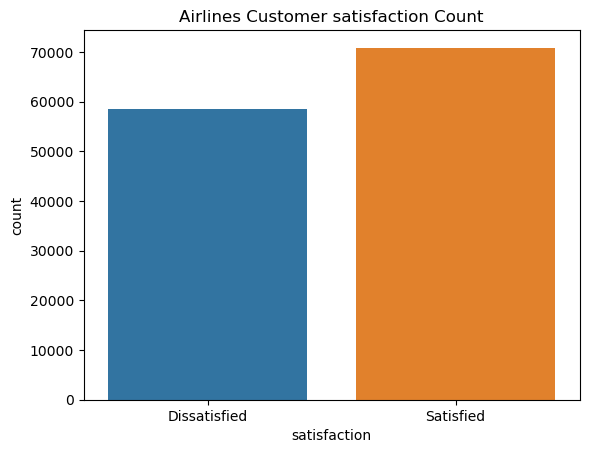

In [13]:
#count the total of satisfied and de ssatisfied customers 
sns.countplot(x="satisfaction", data=df)

plt.title('Airlines Customer satisfaction Count')
plt.xticks([0,1],['Dissatisfied',"Satisfied"])
plt.show()

#there are no imbalaces in the data counts

In [14]:
#do a split of the of the data train and data test
X=df.drop(['satisfaction', 'Class'], axis=1)
Y= df['satisfaction']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7609081782377017

In [15]:
df

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,1,65,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,1,0
1,1,47,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,1,0
2,1,15,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,1,0
3,1,60,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,1,0
4,1,70,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0,0,1,0,1
129876,0,63,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0,0,1,0,1
129877,0,69,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,0,1,0,1
129878,0,66,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,0,1,0,1


In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 

In [17]:
#Predict the satisfaction of a client based on all the variblee. in this case I think is more importante to be precise and get the most true positives as possible 
prediction = LR.predict(X_test)
prediction
print('Precision is:', precision_score(y_test, prediction))
print('Recall is:' , recall_score(y_test, prediction))
print('F1 is:' , f1_score(y_test, prediction))

print(classification_report(y_test, prediction))

Precision is: 0.7625008322791131
Recall is: 0.8135256091496768
F1 is: 0.7871872422326094
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     11821
           1       0.76      0.81      0.79     14077

    accuracy                           0.76     25898
   macro avg       0.76      0.76      0.76     25898
weighted avg       0.76      0.76      0.76     25898



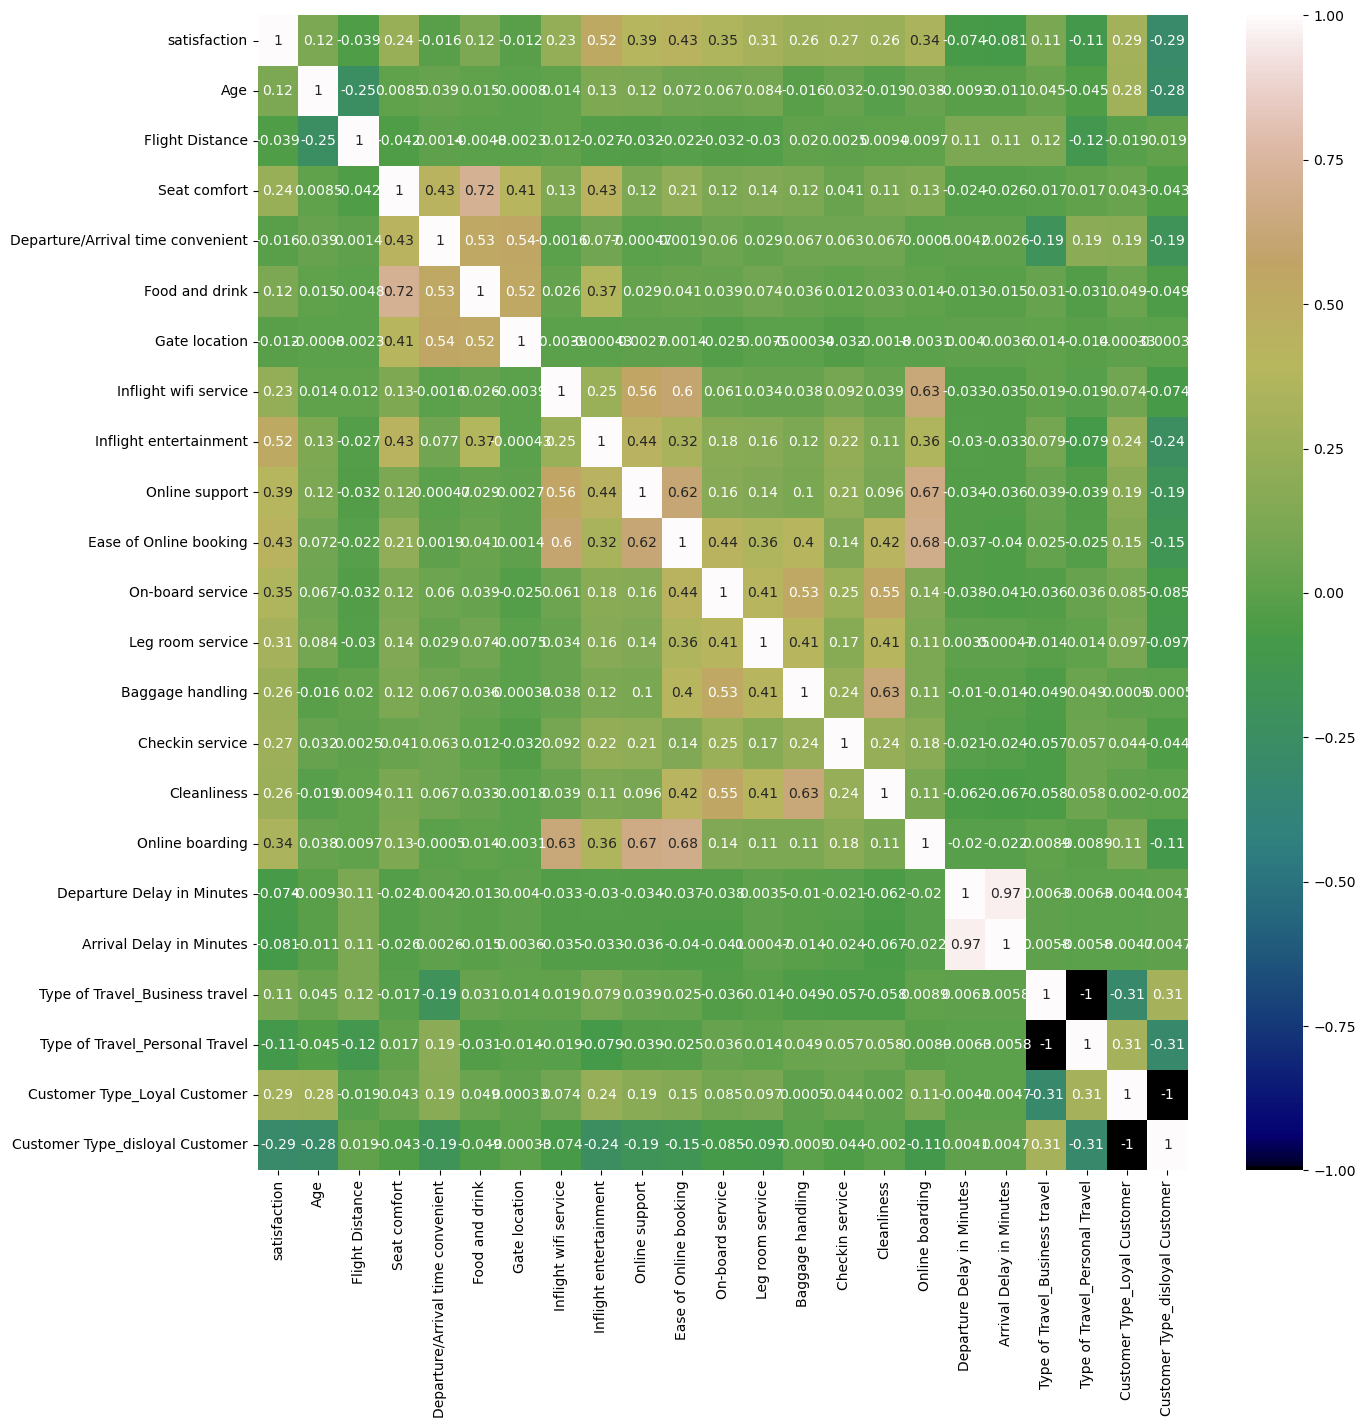

In [18]:
#check for correlation between variables and the independent variables client satisfaction 
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),cmap='gist_earth',annot=True)
plt.show()


In [19]:
#droping variables that have low correlation with the target variable. 
df = df.drop(['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient','Gate location'], axis=1)
df

,satisfaction,Age,Class,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,1,65,Eco,0,0,2,4,2,3,3,0,3,5,3,2,0,1,1,0
1,1,47,Business,0,0,0,2,2,3,4,4,4,2,3,2,0,1,1,0
2,1,15,Eco,0,0,2,0,2,2,3,3,4,4,4,2,0,1,1,0
3,1,60,Eco,0,0,3,4,3,1,1,0,1,4,1,3,0,1,1,0
4,1,70,Eco,0,0,4,3,4,2,2,0,2,4,2,5,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,Eco,5,5,2,5,2,2,3,3,4,4,4,2,0,1,0,1
129876,0,63,Business,2,2,2,1,1,3,2,3,3,1,2,1,0,1,0,1
129877,0,69,Eco,3,3,3,2,2,4,4,3,4,2,3,2,0,1,0,1
129878,0,66,Eco,3,3,3,2,2,3,3,2,3,2,1,2,0,1,0,1


In [20]:
#After droping the columns the lr score increased 
X=df.drop(['satisfaction', 'Class'], axis=1)
Y= df['satisfaction']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.8197544211908255

In [21]:
#thw models precision increased with the droping of the columns
prediction = LR.predict(X_test)
prediction
print('Precision is:', precision_score(y_test, prediction))
print('Recall is:' , recall_score(y_test, prediction))
print('F1 is:' , f1_score(y_test, prediction))

print(classification_report(y_test, prediction))

Precision is: 0.833109112794732
Recall is: 0.8358314981885345
F1 is: 0.834468085106383
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     11821
           1       0.83      0.84      0.83     14077

    accuracy                           0.82     25898
   macro avg       0.82      0.82      0.82     25898
weighted avg       0.82      0.82      0.82     25898



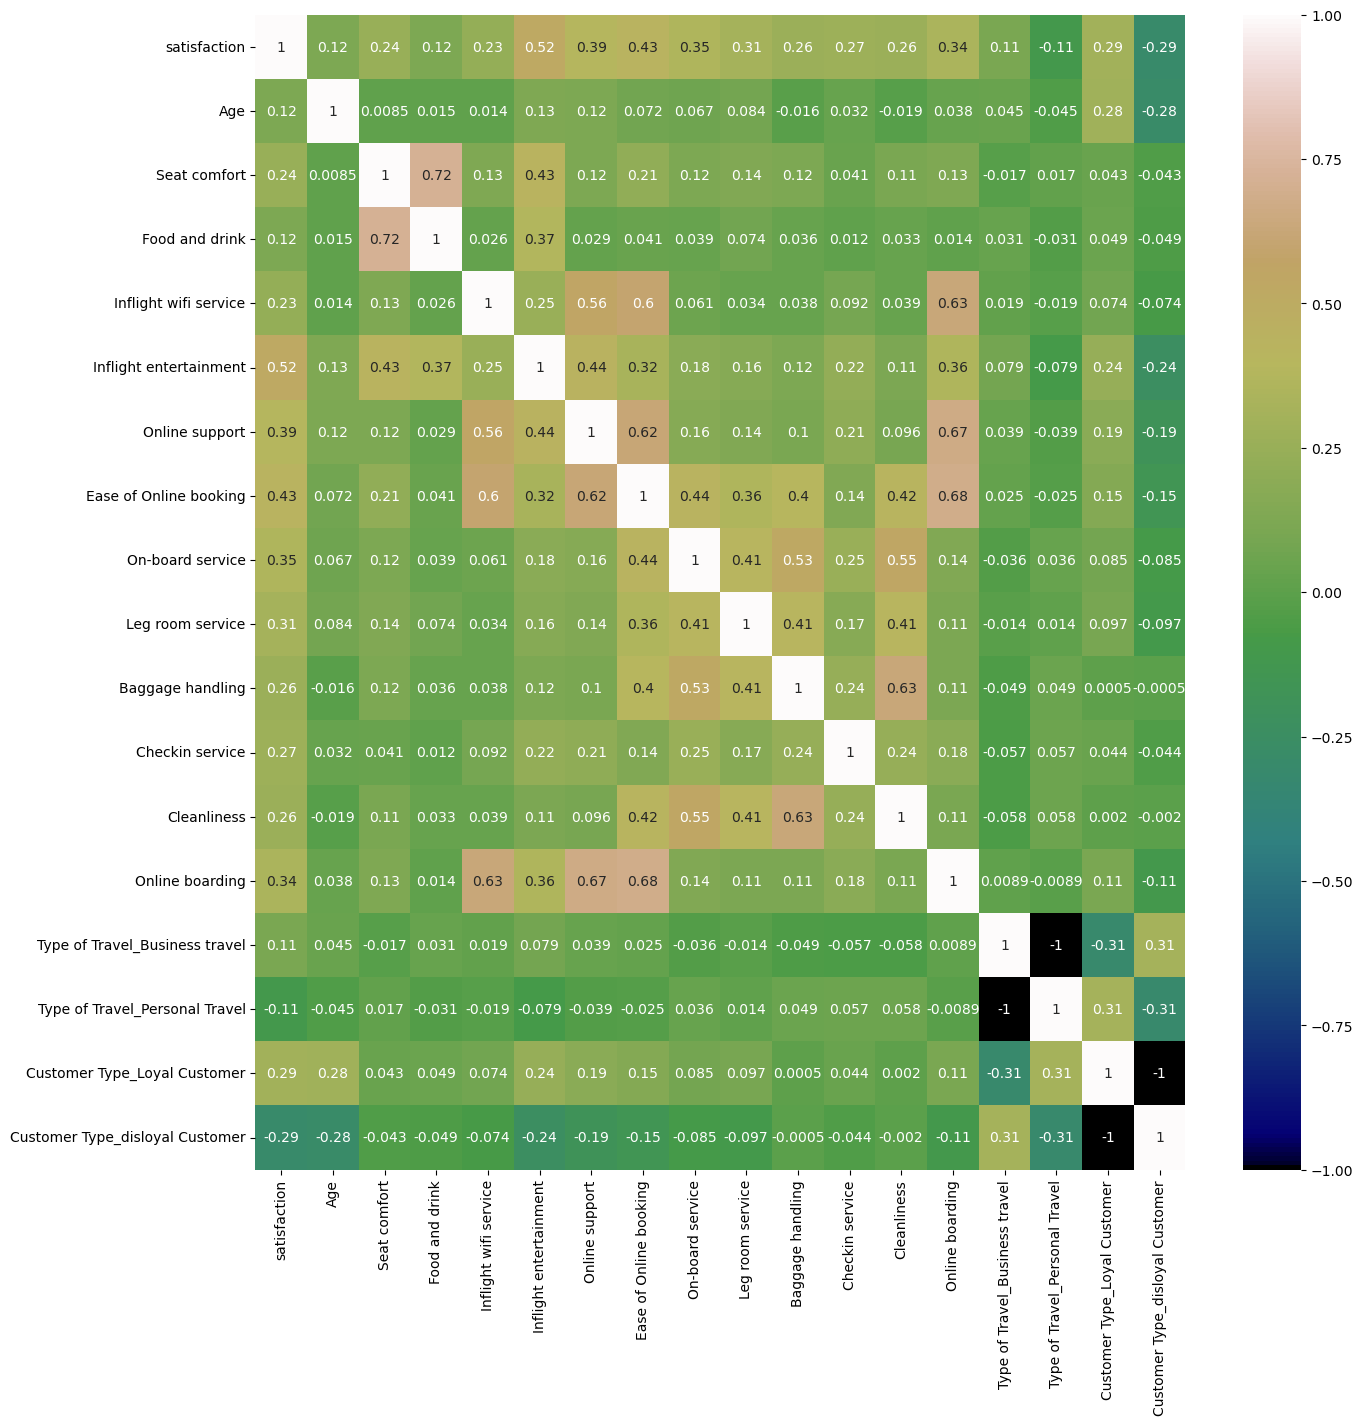

In [22]:
#the best is the recall value since we are interested in catching the unsitisfied customers
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),cmap='gist_earth',annot=True)
plt.show()


In [23]:
#going for the latest model that has high recal score 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[ 9464,  2357],
       [ 2311, 11766]], dtype=int64)